In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

df_train = pd.read_csv(r'C:\\python\\datamining\\data\\train-data.csv')
df_train.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,null bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 1. 데이터전처리

In [2]:
# 결측치 확인 
print(df_train.isnull().sum())

## Mileage, Engine, Power, Seats 값 평균값으로 결측치 채우기.
## Seat값이 0인것이 있다 -> 오류  value을 평균으로 바꾸기
df_train["Seats"].fillna(value = df_train['Seats'].mode(), inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.head()

## Mileage, Engine, Power 값 단위가 포함되어있어 제거
df_train['Mileage'] = df_train.Mileage.str.split(' ').str[0]
df_train['Engine'] = df_train.Engine.str.split(' ').str[0]
df_train['Power'] = df_train.Power.str.split(' ').str[0]
df_train=df_train.replace({'Power':'null'},{'Power':'0'})
df_train.head()

## Mileage, Engine, Power 값 float단위로 변환
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Power'] = df_train['Power'].astype(float)
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

## Mileage, Engine, Power 값 결측치 or 0값 평균값으로 채운다
df_train=df_train.replace({'Mileage':0},{'Mileage':df_train['Mileage'].mode()})
df_train=df_train.replace({'Engine':0},{'Engine':df_train['Engine'].mode()})
df_train=df_train.replace({'Power':0},{'Power':df_train['Power'].mode()})
df_train['Mileage'].fillna(value = df_train['Mileage'].mode(), inplace = True)
df_train['Engine'].fillna(value = df_train['Engine'].mode(), inplace = True)
df_train['Power'].fillna(value = df_train['Power'].mode(), inplace = True)

## 이상한 칼럼 제거 (Unname:0 , New_price)
df_train.drop(columns=['New_Price','Unnamed: 0'], inplace=True)
df_train.dropna("index",inplace=True)

## 확인
print(df_train.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [3]:
## data shape , type
print(df_train.shape)
print(df_train.info())
df_train

(5975, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   float64
 3   Kilometers_Driven  5975 non-null   float64
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(7), object(5)
memory usage: 606.8+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,74.00,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014.0,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015.0,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012.0,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013.0,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [4]:
## 고유한 값을 가지는 name확인 
print("train data 의 name 갯수-> ",len(np.unique(list(df_train.Name))))

## name중 브랜드 이름만 
df_train['brand_name'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_train.drop(columns=["Name"], axis=1, inplace=True)
df_train=df_train[['brand_name','Location','Year'	,'Kilometers_Driven'	,'Fuel_Type'	,'Transmission'	,'Owner_Type'	,'Mileage'	,'Engine'	,'Power'	,'Seats'	,'Price']]
print("train data 의 브랜드 갯수-> ",len(np.unique(list(df_train.brand_name))))

df_train=df_train.reset_index(drop=True)
print(df_train.dtypes)


train data 의 name 갯수->  1855
train data 의 브랜드 갯수->  31
brand_name            object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [5]:
## 중복??되는 컬럼의 이름들 -> brand_name lsuzu -> ISUZU  
print("브랜드이름들 \n",np.unique(list(df_train.brand_name)))
df_train.brand_name[df_train.brand_name == 'Isuzu'] = 'ISUZU'
print("Location이름들 \n",np.unique(list(df_train.Location)))
print("Fuel_Type이름들 \n",np.unique(list(df_train.Fuel_Type)))
print("Transmission이름들 \n",np.unique(list(df_train.Transmission)))
print("Owner_Type이름들 \n",np.unique(list(df_train.Owner_Type)))
## 

브랜드이름들 
 ['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'ISUZU' 'Isuzu' 'Jaguar' 'Jeep' 'Lamborghini'
 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Smart' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
Location이름들 
 ['Ahmedabad' 'Bangalore' 'Chennai' 'Coimbatore' 'Delhi' 'Hyderabad'
 'Jaipur' 'Kochi' 'Kolkata' 'Mumbai' 'Pune']
Fuel_Type이름들 
 ['CNG' 'Diesel' 'LPG' 'Petrol']
Transmission이름들 
 ['Automatic' 'Manual']
Owner_Type이름들 
 ['First' 'Fourth & Above' 'Second' 'Third']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 데이터 점검

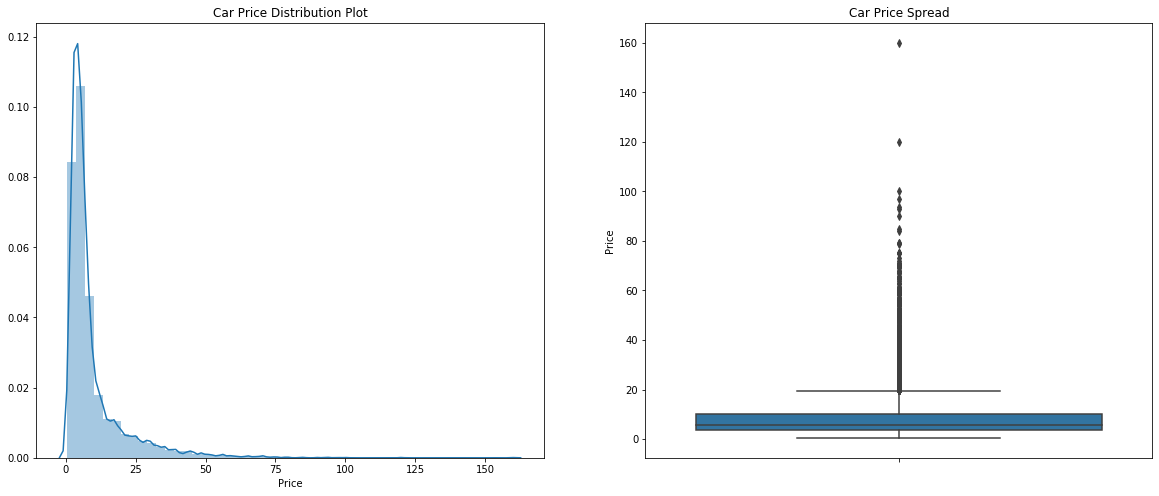

In [6]:
## 자동차 가격 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_train.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_train.Price)

plt.show()

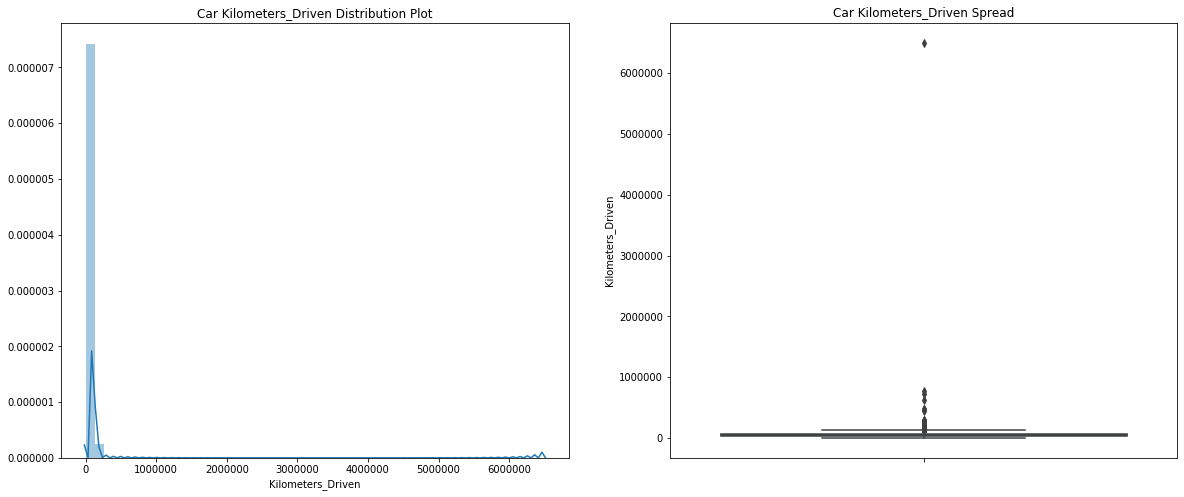

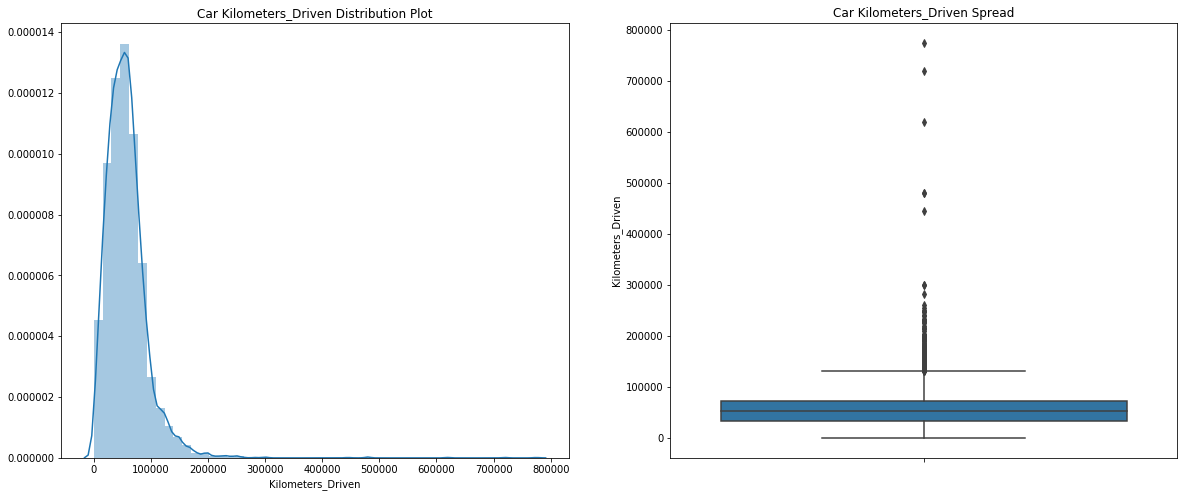

In [7]:
## 자동차 Kilometers_Driven 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Kilometers_Driven Distribution Plot')
sns.distplot(df_train.Kilometers_Driven)

plt.subplot(1,2,2)
plt.title('Car Kilometers_Driven Spread')
sns.boxplot(y=df_train.Kilometers_Driven)

plt.show()

## 이상치 삭제 -> kilometer 6000000 이상인거
idx=[]
it=list(df_train['Kilometers_Driven'])
for i in range(len(it)):
    if(it[i]>1000000):
        idx.append(i)
df_train=df_train.drop(idx)
df_train=df_train.reset_index(drop=True)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Kilometers_Driven Distribution Plot')
sns.distplot(df_train.Kilometers_Driven)

plt.subplot(1,2,2)
plt.title('Car Kilometers_Driven Spread')
sns.boxplot(y=df_train.Kilometers_Driven)

plt.show()

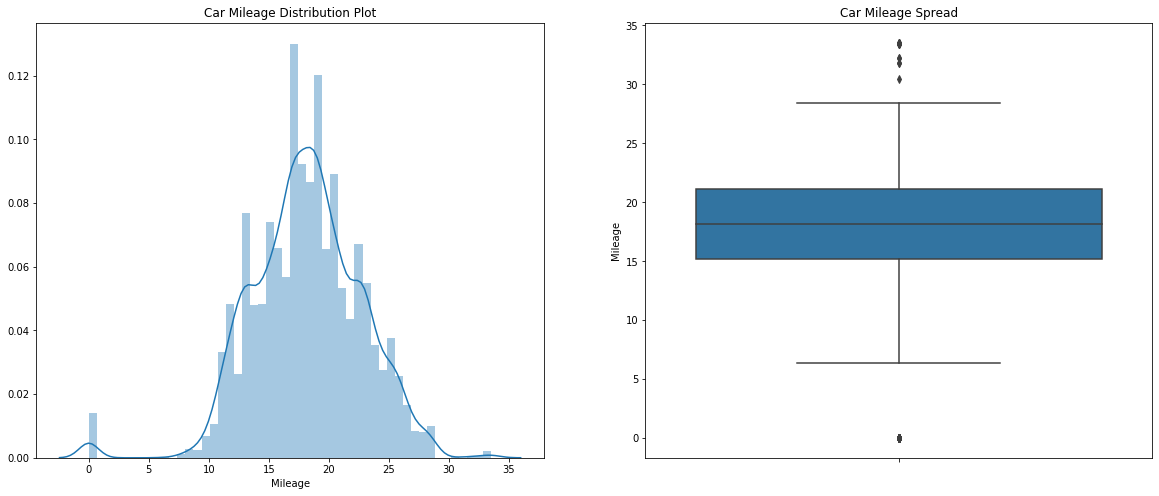

In [8]:
## 자동차 Mileage 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Mileage Distribution Plot')
sns.distplot(df_train.Mileage)

plt.subplot(1,2,2)
plt.title('Car Mileage Spread')
sns.boxplot(y=df_train.Mileage)

plt.show()

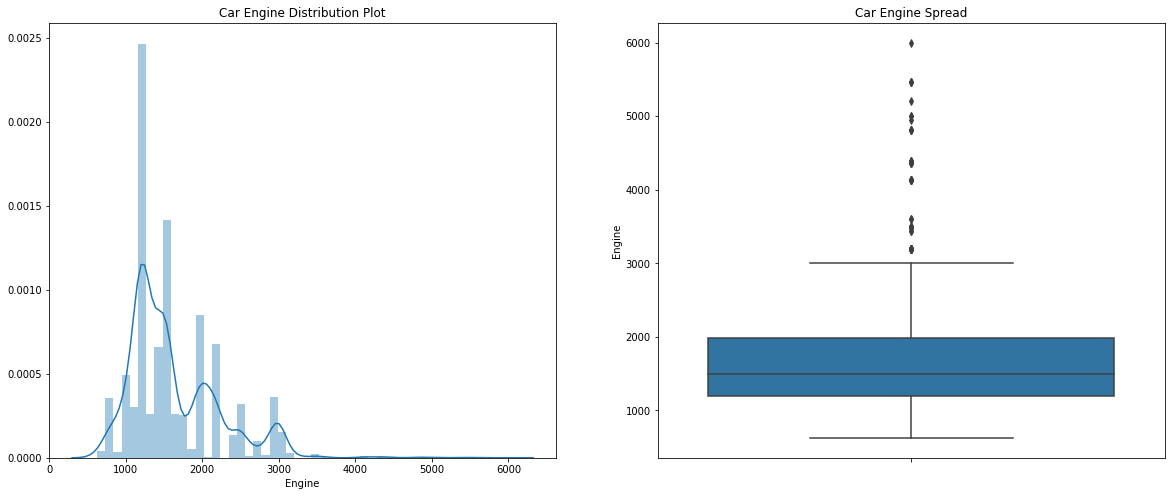

In [9]:
## 자동차 Engine 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Engine Distribution Plot')
sns.distplot(df_train.Engine)

plt.subplot(1,2,2)
plt.title('Car Engine Spread')
sns.boxplot(y=df_train.Engine)

plt.show()

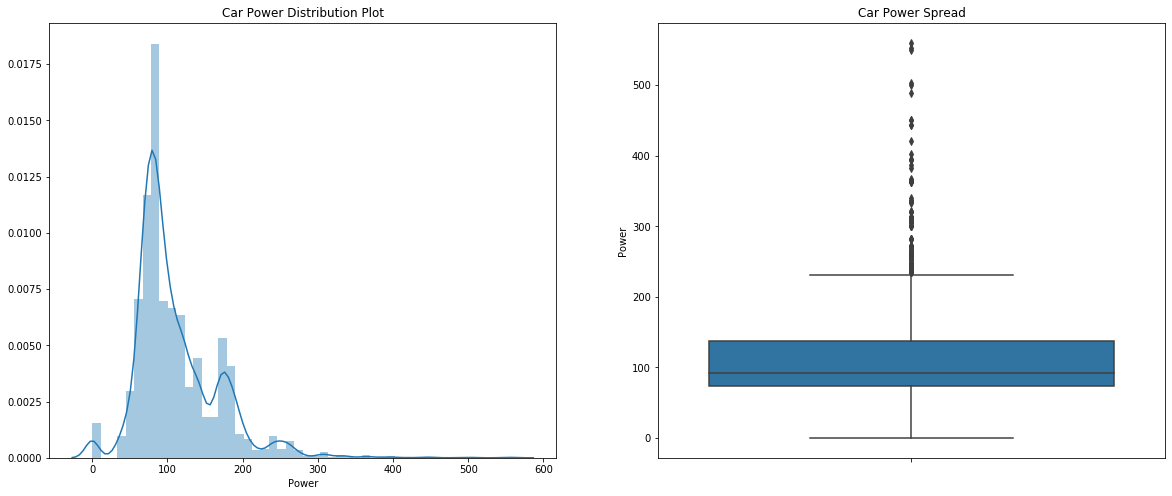

In [10]:
## 자동차 Power 분포
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Power Distribution Plot')
sns.distplot(df_train.Power)

plt.subplot(1,2,2)
plt.title('Car Power Spread')
sns.boxplot(y=df_train.Power)

plt.show()

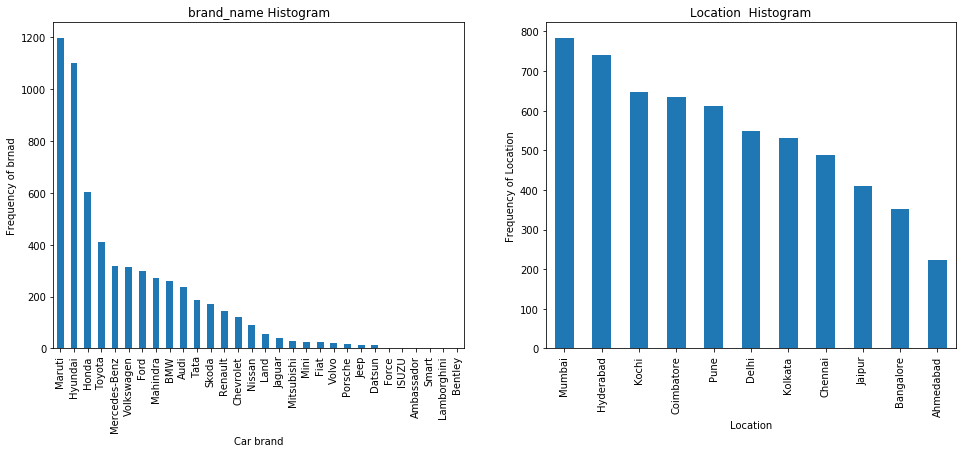

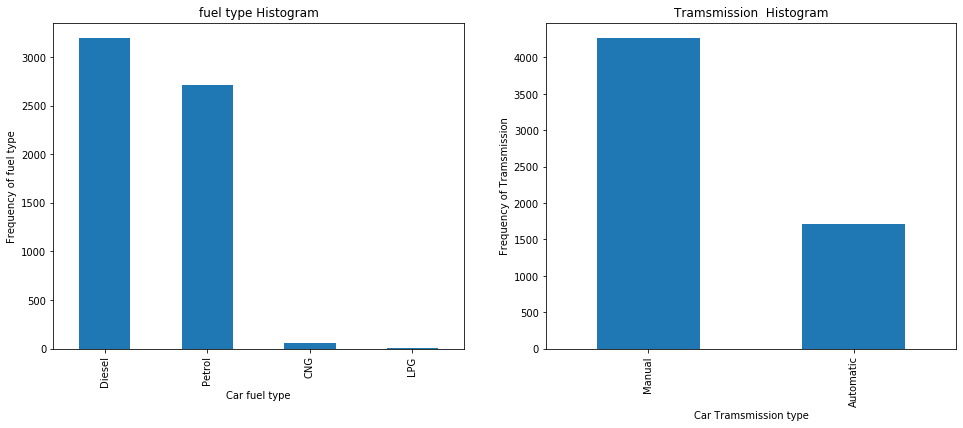

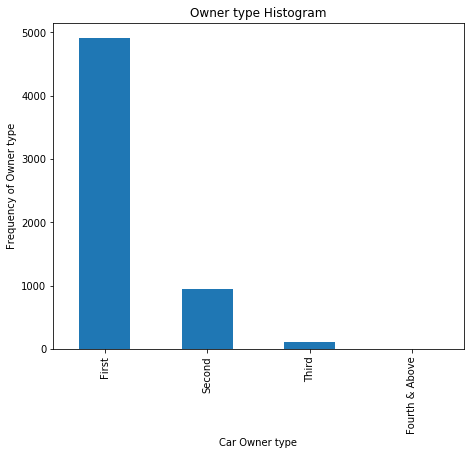

In [11]:
## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.brand_name.value_counts().plot(kind='bar')
plt.title('brand_name Histogram')
plt1.set(xlabel = 'Car brand', ylabel='Frequency of brnad')

plt.subplot(1,3,2)
plt1 = df_train.Location.value_counts().plot(kind='bar')
plt.title('Location  Histogram')
plt1.set(xlabel = 'Location', ylabel='Frequency of Location')


plt.show()

## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.Fuel_Type.value_counts().plot(kind='bar')
plt.title('fuel type Histogram')
plt1.set(xlabel = 'Car fuel type', ylabel='Frequency of fuel type')

plt.subplot(1,3,2)
plt1 = df_train.Transmission.value_counts().plot(kind='bar')
plt.title('Tramsmission  Histogram')
plt1.set(xlabel = 'Car Tramsmission type', ylabel='Frequency of Tramsmission')


plt.show()

## brand 종류 , location 종류, fuel-종류, Trainsmission종류, owner 종류
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_train.Owner_Type.value_counts().plot(kind='bar')
plt.title('Owner type Histogram')
plt1.set(xlabel = 'Car Owner type', ylabel='Frequency of Owner type')


plt.show()

## 2. 종속변수와 데이터 상관관계 파악

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


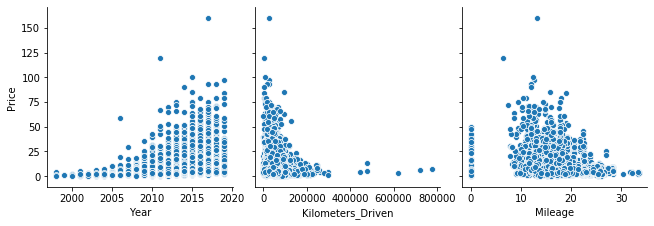

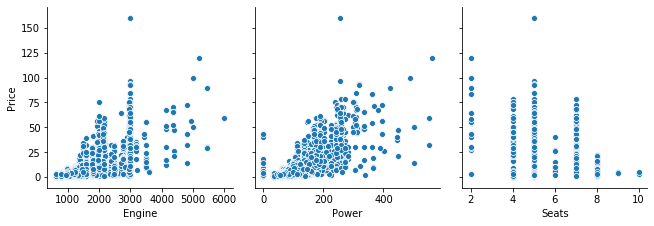

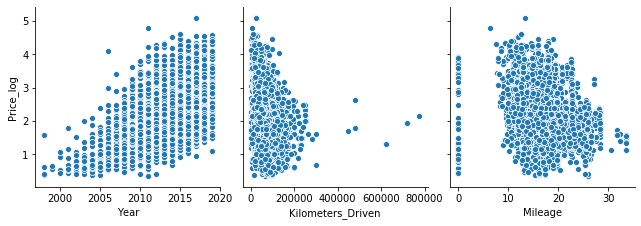

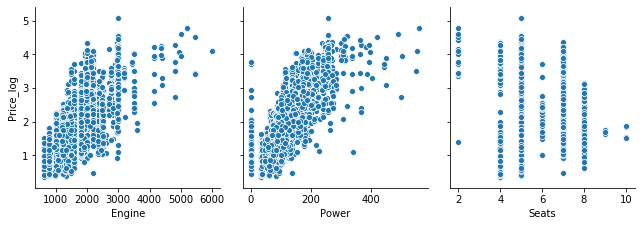

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_train['Price_log'] = np.log1p(df_train['Price'].values)

## 상관관계 파악을 위한 
sns.pairplot(data=df_train, x_vars=["Year","Kilometers_Driven","Mileage"],y_vars='Price' ,size=3)

sns.pairplot(data=df_train, x_vars=["Engine","Power","Seats"],y_vars='Price' ,size=3)

sns.pairplot(data=df_train, x_vars=["Year","Kilometers_Driven","Mileage"],y_vars='Price_log' ,size=3)

sns.pairplot(data=df_train, x_vars=["Engine","Power","Seats"],y_vars='Price_log' ,size=3)
del df_train['Price']

In [13]:
## 상관관계파악
df_train.corr()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.448798,0.314547,-0.052992,0.069294,0.012005,0.472309
Kilometers_Driven,-0.448798,1.000000,-0.143095,0.154565,-0.016423,0.213149,-0.186217
Mileage,0.314547,-0.143095,1.000000,-0.598725,-0.453386,-0.311128,-0.289020
Engine,-0.052992,0.154565,-0.598725,1.000000,0.842340,0.397872,0.701066
Power,0.069294,-0.016423,-0.453386,0.842340,1.000000,0.107146,0.782610
Seats,0.012005,0.213149,-0.311128,0.397872,0.107146,1.000000,0.157186
Price_log,0.472309,-0.186217,-0.289020,0.701066,0.782610,0.157186,1.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


## 상관관계파악
df_train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.448798,0.314547,-0.052992,0.069294,0.012005,0.472309
Kilometers_Driven,-0.448798,1.000000,-0.143095,0.154565,-0.016423,0.213149,-0.186217
Mileage,0.314547,-0.143095,1.000000,-0.598725,-0.453386,-0.311128,-0.289020
Engine,-0.052992,0.154565,-0.598725,1.000000,0.842340,0.397872,0.701066
Power,0.069294,-0.016423,-0.453386,0.842340,1.000000,0.107146,0.782610
Seats,0.012005,0.213149,-0.311128,0.397872,0.107146,1.000000,0.157186
Price_log,0.472309,-0.186217,-0.289020,0.701066,0.782610,0.157186,1.000000


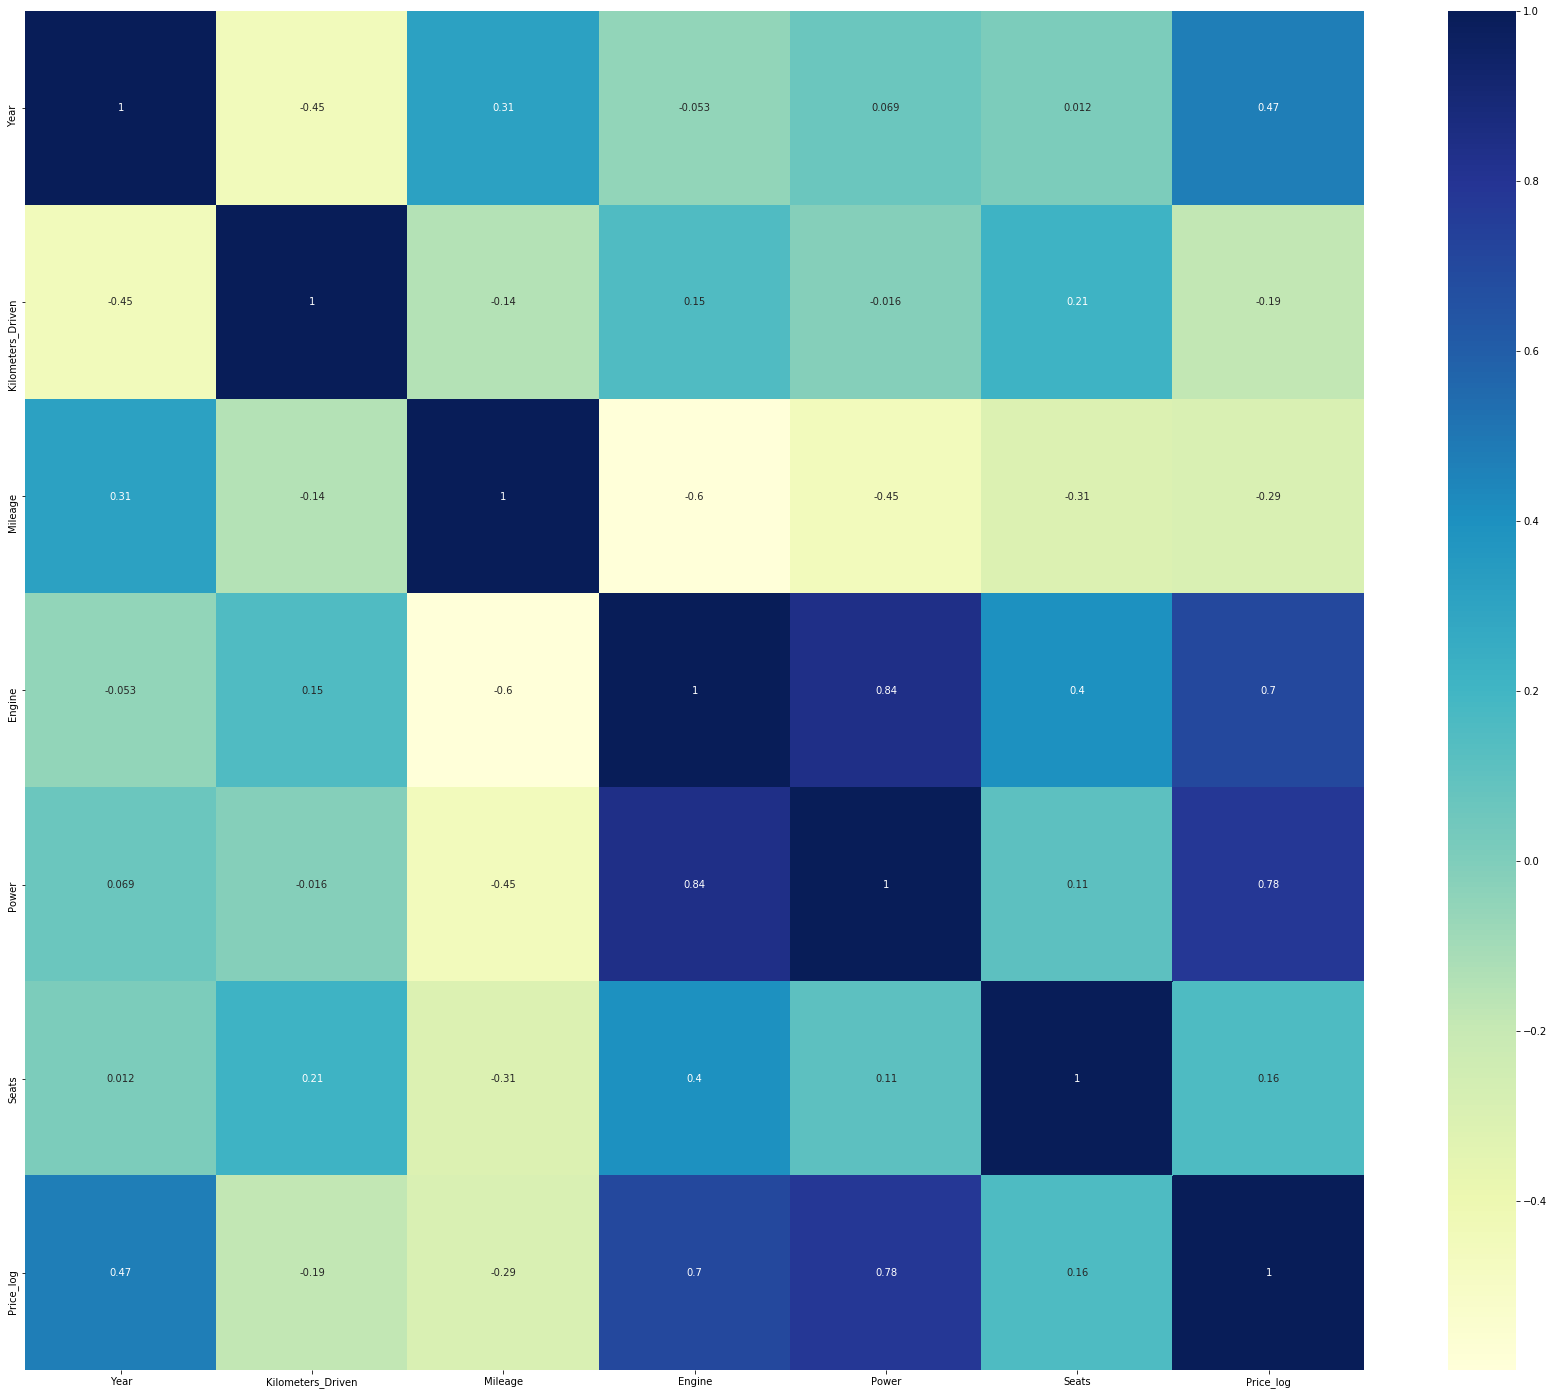

In [15]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [16]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_train = dummies('brand_name',df_train)
df_train = dummies('Location',df_train)
df_train = dummies('Fuel_Type',df_train)
df_train = dummies('Transmission',df_train)
df_train = dummies('Owner_Type',df_train)


In [17]:
df_train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log,Audi,BMW,Bentley,...,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
Year,1.000000,-0.448798,0.314547,-0.052992,0.069294,0.012005,0.472309,0.014256,-0.020882,-0.029434,...,-0.030039,-0.005918,-0.112083,0.121193,-0.032615,-0.122291,-0.095547,-0.073433,-0.293703,-0.233596
Kilometers_Driven,-0.448798,1.000000,-0.143095,0.154565,-0.016423,0.213149,-0.186217,-0.023603,-0.015364,-0.003276,...,-0.114987,-0.129379,0.115410,0.227035,0.002561,-0.226583,0.107465,0.076815,0.162796,0.113146
Mileage,0.314547,-0.143095,1.000000,-0.598725,-0.453386,-0.311128,-0.289020,-0.134912,-0.057420,-0.027413,...,0.068586,-0.066513,-0.013455,0.109172,0.010914,-0.140401,0.342453,-0.051261,-0.120176,-0.087244
Engine,-0.052992,0.154565,-0.598725,1.000000,0.842340,0.397872,0.701066,0.222925,0.248786,0.094261,...,-0.074796,0.029835,-0.042044,0.427558,-0.040485,-0.408380,-0.500775,0.020579,0.044105,0.019292
Power,0.069294,-0.016423,-0.453386,0.842340,1.000000,0.107146,0.782610,0.292933,0.379530,0.102968,...,-0.063551,0.061452,-0.064556,0.287375,-0.037997,-0.268674,-0.635313,-0.012805,0.018614,-0.017140
Seats,0.012005,0.213149,-0.311128,0.397872,0.107146,1.000000,0.157186,0.001053,-0.086361,-0.020542,...,-0.044002,-0.003256,-0.004423,0.308750,-0.014209,-0.302437,0.073879,0.044079,-0.005425,0.012229
Price_log,0.472309,-0.186217,-0.289020,0.701066,0.782610,0.157186,1.000000,0.314015,0.315117,0.035928,...,-0.147935,0.014661,-0.113864,0.427461,-0.043232,-0.410673,-0.631476,-0.028468,-0.126104,-0.119602
Audi,0.014256,-0.023603,-0.134912,0.222925,0.292933,0.001053,0.314015,1.000000,-0.043347,-0.002624,...,-0.014922,-0.015198,-0.045923,0.156471,-0.008304,-0.152251,-0.320510,-0.007426,0.017255,-0.015177
BMW,-0.020882,-0.015364,-0.057420,0.248786,0.379530,-0.086361,0.315117,-0.043347,1.000000,-0.002766,...,-0.032129,0.035768,-0.004808,0.153438,-0.008752,-0.148969,-0.337796,-0.007827,0.025416,0.006977
Bentley,-0.029434,-0.003276,-0.027413,0.094261,0.102968,-0.020542,0.035928,-0.002624,-0.002766,1.000000,...,-0.004037,-0.005029,-0.004375,-0.013869,-0.000530,0.014181,-0.020449,-0.000474,-0.005637,-0.001780


In [18]:
#df_train=pd.get_dummies(df_train,prefix_sep='_')
y_train = df_train.pop('Price_log')
X_train = df_train
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force',
       'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jeep', 'Lamborghini',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Diesel',
       'LPG', 'Petrol', 'Manual', 'Fourth & Above', 'Second', 'Third'],
      dtype='object')

## 3. 모델 생성

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3)
from sklearn.tree import DecisionTreeRegressor


sample_ratio = 0.02
msl = round(sample_ratio * len(x_train))
dtr= DecisionTreeRegressor(max_depth=1000, min_samples_split=30, min_samples_leaf=msl, random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1000,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=84, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [20]:
print("훈련 세트 정확도: {:.3f}".format(dtr.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dtr.score(x_test, y_test)))

훈련 세트 정확도: 0.857
테스트 세트 정확도: 0.846


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = dtr.score(x_train,y_train)
print('R-squared.: ',model_score)
      
y_predicted = dtr.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))      

R-squared.:  0.8573630088998498
Mean squared error: 0.09
Test Variance score: 0.85


In [22]:
## mse test
y_pred = dtr.predict(x_test)
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

0.08649654209242941

In [23]:
## mse train
y_pred_train = dtr.predict(x_train)
mean_squared_error(y_train, y_pred_train)

0.07917336647833022

In [24]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


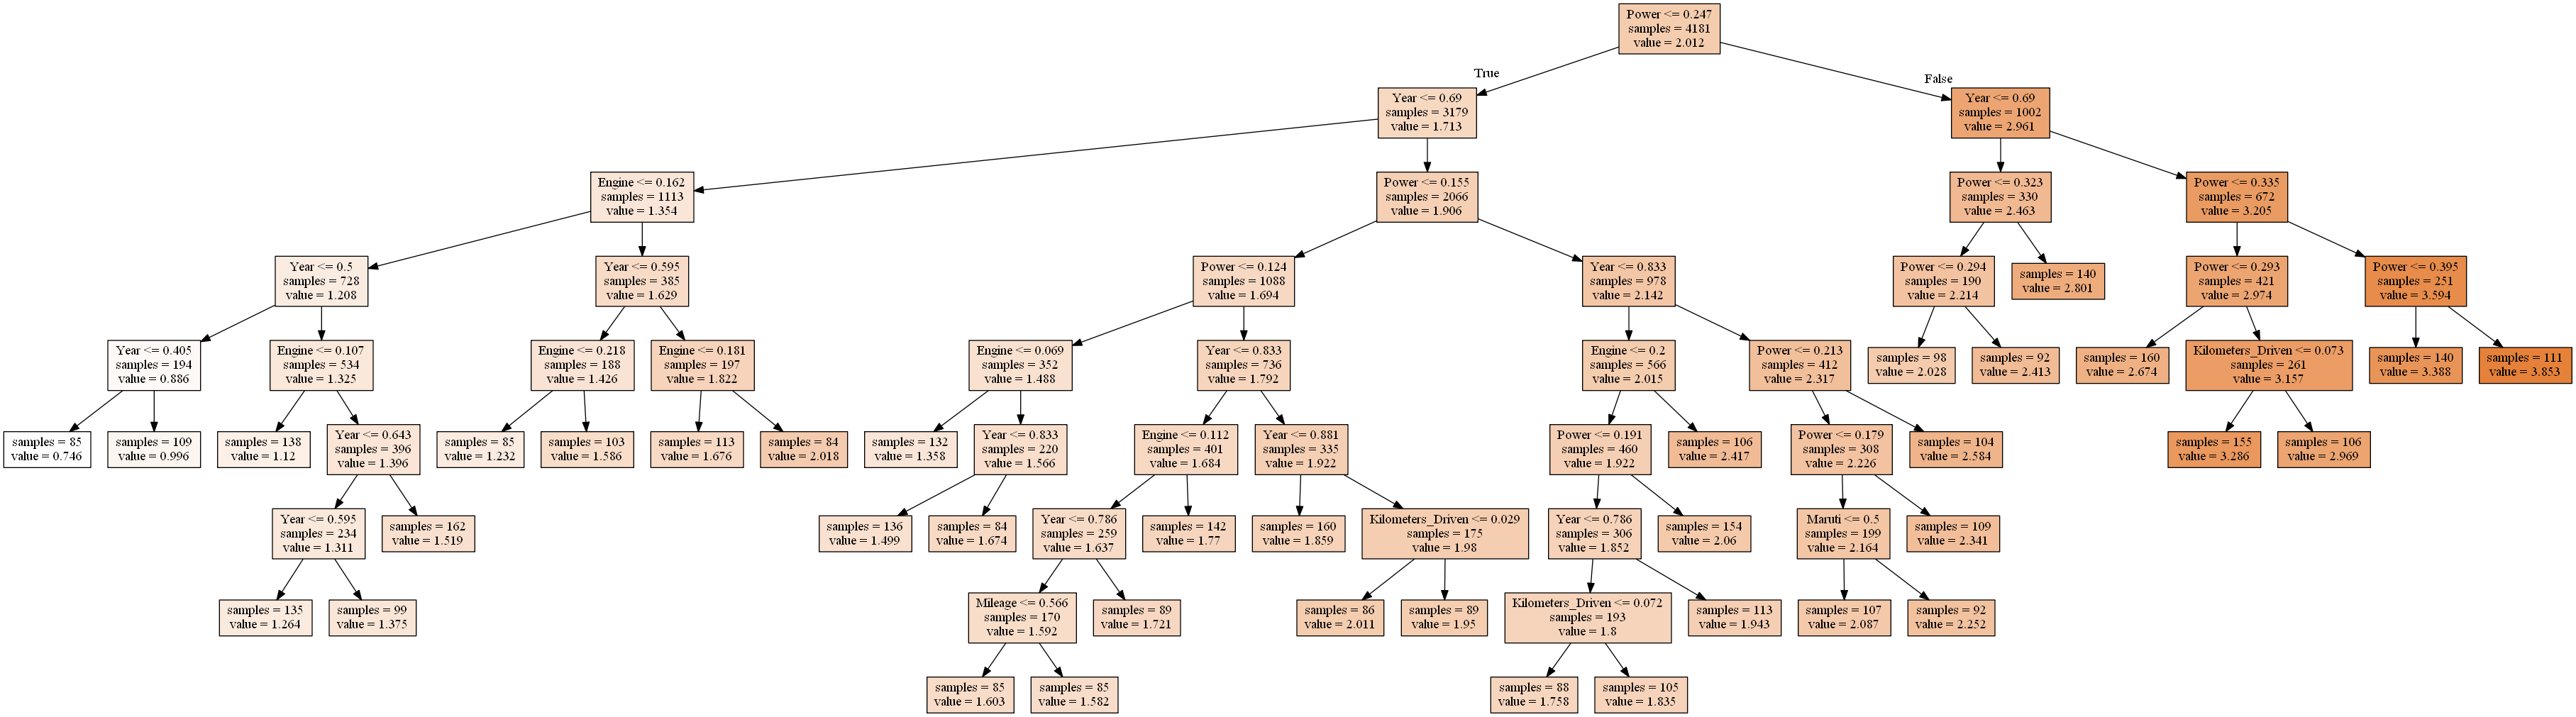

In [25]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(dtr, out_file=dot_file,
                feature_names=X_train.columns,
                impurity=False, filled=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())
#graph.set_size('"100,100!"')
#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 
Image(graph.create_png())

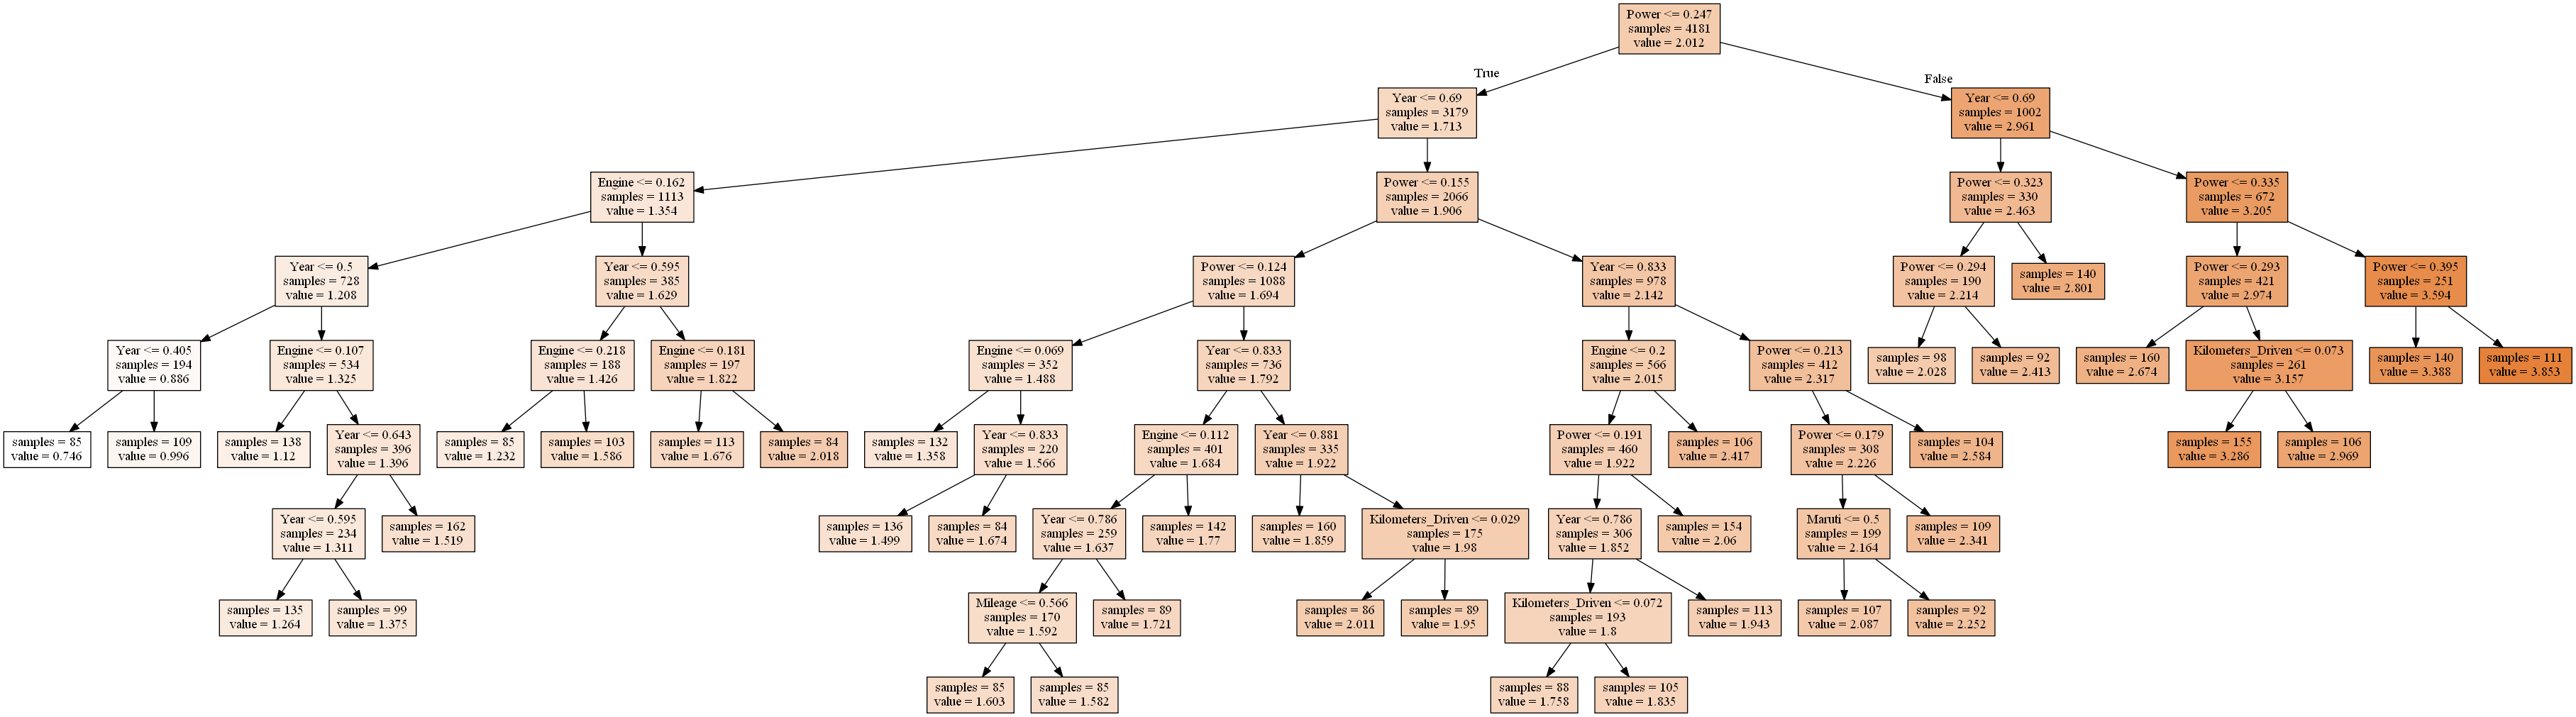

In [26]:
import os
os.environ["Path"]+=os.pathsep+'C:\\Program Files (x86)\\Graphviz2.38\\bin'
Image(graph.create_png())

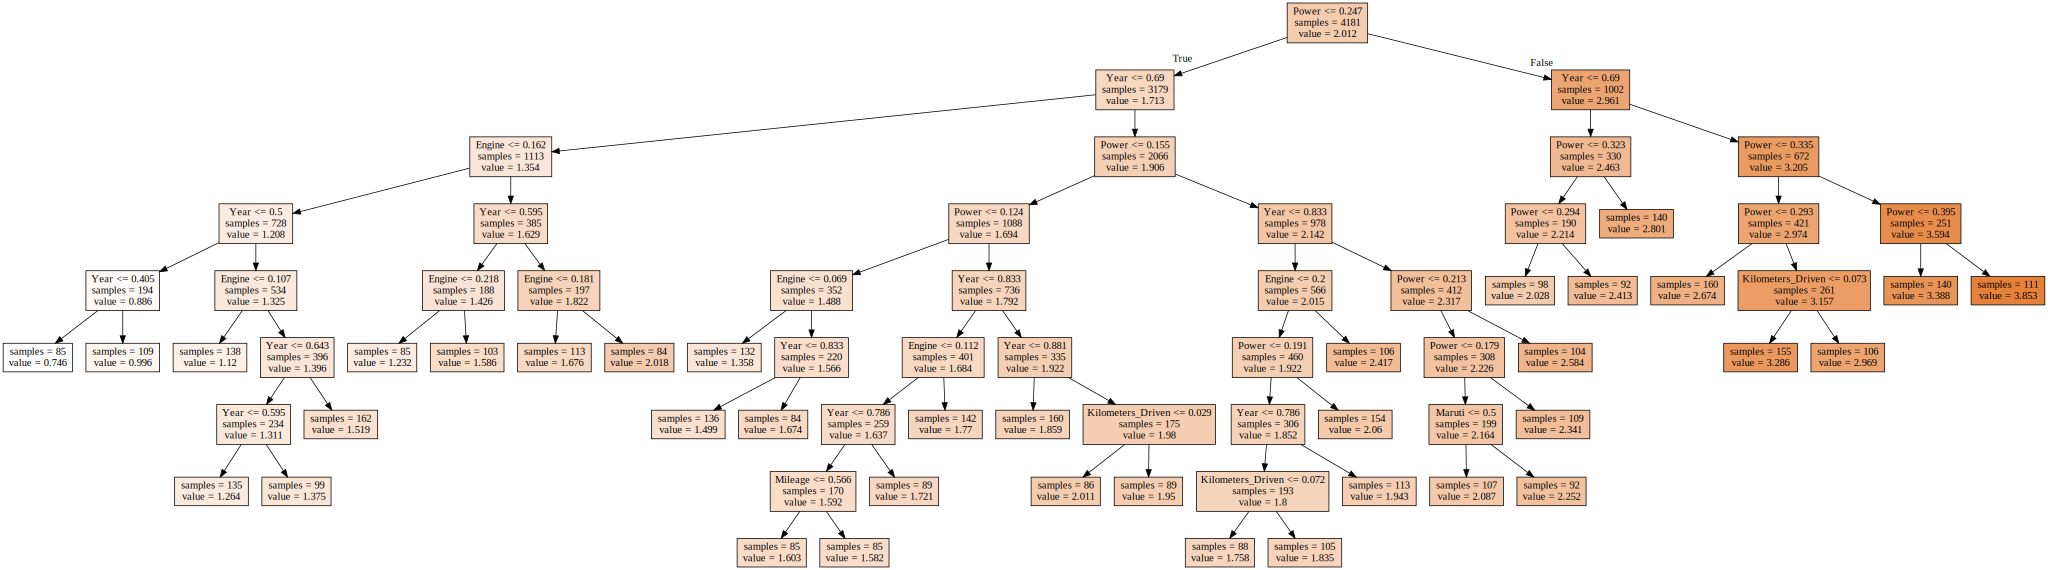

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(dtr, out_file="tree.dot",
                feature_names=X_train.columns,
                impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
# tree를 만드는 결정에 각 특성이 얼마나 중요한지는 평가
feature_imp = dtr.feature_importances_
for i in range(int(len(feature_imp))):
    print(X_train.columns[i],"=",feature_imp[i])

Year = 0.21624513889596217
Kilometers_Driven = 0.003402018216019043
Mileage = 9.329298326052136e-06
Engine = 0.045311813168770074
Power = 0.7343567728501408
Seats = 0.0
Audi = 0.0
BMW = 0.0
Bentley = 0.0
Chevrolet = 0.0
Datsun = 0.0
Fiat = 0.0
Force = 0.0
Ford = 0.0
Honda = 0.0
Hyundai = 0.0
ISUZU = 0.0
Jaguar = 0.0
Jeep = 0.0
Lamborghini = 0.0
Land = 0.0
Mahindra = 0.0
Maruti = 0.0006749275707818875
Mercedes-Benz = 0.0
Mini = 0.0
Mitsubishi = 0.0
Nissan = 0.0
Porsche = 0.0
Renault = 0.0
Skoda = 0.0
Smart = 0.0
Tata = 0.0
Toyota = 0.0
Volkswagen = 0.0
Volvo = 0.0
Bangalore = 0.0
Chennai = 0.0
Coimbatore = 0.0
Delhi = 0.0
Hyderabad = 0.0
Jaipur = 0.0
Kochi = 0.0
Kolkata = 0.0
Mumbai = 0.0
Pune = 0.0
Diesel = 0.0
LPG = 0.0
Petrol = 0.0
Manual = 0.0
Fourth & Above = 0.0
Second = 0.0
Third = 0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from c

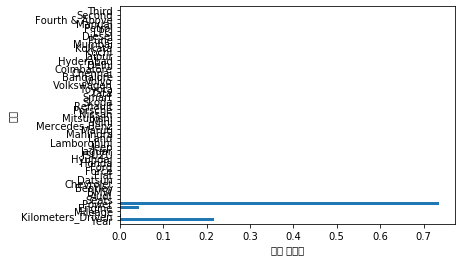

In [29]:
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtr)

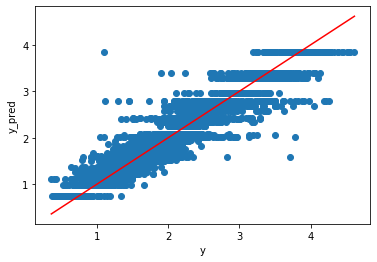

In [30]:
y_pred = dtr.predict(x_train)
price_tree = np.exp(y_pred)
y_pred.shape, y_train.shape, X_train.shape

import matplotlib.pyplot as plt
# 실측치y와 예측치y의 관계성 #
plt.scatter(y_train, y_pred)
line = np.linspace(min(y_train.values), max(y_train.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()